In [1]:
import pickle

import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
all_data = []
for i in range(105):
    filename = "data_out/ex1_1_{}.pickle".format(i)
    zip_file = filename + ".tar.bz2"
    !tar -jxvf $zip_file 
    df = pd.read_pickle(filename)
    df["Iteration"] = i
    #df["Outcome_sub"] = df.Outcome.str.slice(0, 3)
    #df["Model_Outcome_sub"] = df.Model_Outcome.str.slice(0, 3)
    
    all_data.append(df)
    !rm $filename

x data_out/ex1_1_0.pickle
x data_out/ex1_1_1.pickle
x data_out/ex1_1_2.pickle
x data_out/ex1_1_3.pickle
x data_out/ex1_1_4.pickle
x data_out/ex1_1_5.pickle
x data_out/ex1_1_6.pickle
x data_out/ex1_1_7.pickle
x data_out/ex1_1_8.pickle
x data_out/ex1_1_9.pickle
x data_out/ex1_1_10.pickle
x data_out/ex1_1_11.pickle
x data_out/ex1_1_12.pickle
x data_out/ex1_1_13.pickle
x data_out/ex1_1_14.pickle
x data_out/ex1_1_15.pickle
x data_out/ex1_1_16.pickle
x data_out/ex1_1_17.pickle
x data_out/ex1_1_18.pickle
x data_out/ex1_1_19.pickle
x data_out/ex1_1_20.pickle
x data_out/ex1_1_21.pickle
x data_out/ex1_1_22.pickle
x data_out/ex1_1_23.pickle
x data_out/ex1_1_24.pickle
x data_out/ex1_1_25.pickle
x data_out/ex1_1_26.pickle
x data_out/ex1_1_27.pickle
x data_out/ex1_1_28.pickle
x data_out/ex1_1_29.pickle
x data_out/ex1_1_30.pickle
x data_out/ex1_1_31.pickle
x data_out/ex1_1_32.pickle
x data_out/ex1_1_33.pickle
x data_out/ex1_1_34.pickle
x data_out/ex1_1_35.pickle
x data_out/ex1_1_36.pickle
x data_out/

In [3]:
data = pd.concat(all_data)

In [4]:
data.head()

,year,ccode1,ccode2,Outcome,Equilibrium,Model_Outcome,Move_Quality,Iteration
0,1816,2,200,StatusQuo,eqTacqa,Acquiesce_B,0.000000,0
1,1816,2,210,StatusQuo,eqTacqa,Acquiesce_B,0.000000,0
2,1816,2,220,StatusQuo,eqTacqa,Capitulate_A2,0.400000,0
3,1816,2,225,StatusQuo,eqTacqa,Capitulate_B2,0.333333,0
4,1816,2,230,Capitulate_B,eqTacqa,Capitulate_B2,0.333333,0


In [5]:
outcome_crosswalk = {
    "Capitulate_A2": "Capitulate_A",
    "Capitulate_A1": "Capitulate_A",
    "Capitulate_B2": "Capitulate_B",
    "Capitulate_B1": "Capitulate_B",
    "Negotiate_1": "Negotiation",
    "Negotiate_2": "Negotiation",
    "War_A1": "War",
    "War_A2": "War",
    "War_B1": "War",
    "War_B2": "War"
}

In [6]:
data["Model_Outcome_sub"] = data.Model_Outcome.replace(outcome_crosswalk)

In [7]:
data["Model_Correct"] = 0
data.loc[(data.Outcome==data.Model_Outcome_sub), "Model_Correct"] = 1

# Pretty graphs

In [2]:
params = {
    "font.family": 'serif',
    "font.serif": ["Computer Modern"],
    'text.usetex': True,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 14

   }
plt.rcParams.update(params)

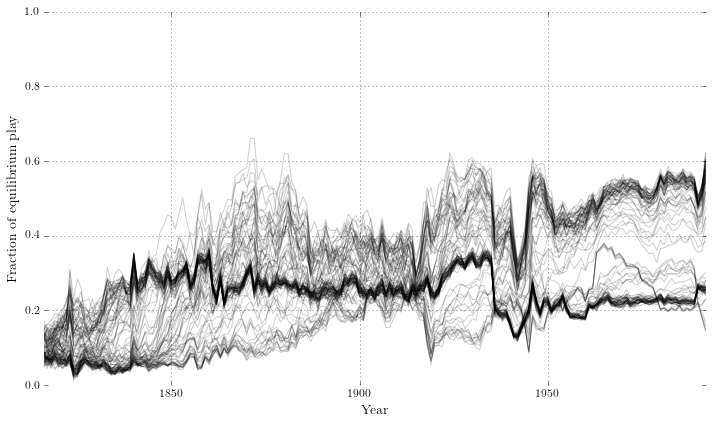

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    s = group.groupby("year").aggregate(lambda x: len(x[x.Move_Quality==1])/len(x))["ccode1"]
    #ax.plot(s, c='k', alpha=0.2)
    s.plot(c='k', alpha=0.2, ax=ax)
    
ax.set_xlabel("Year")
ax.set_ylabel("Fraction of equilibrium play")
ax.grid(True)
ax.set_ylim(0, 1)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

fig.tight_layout()

In [10]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "CB_equilibria.pdf")

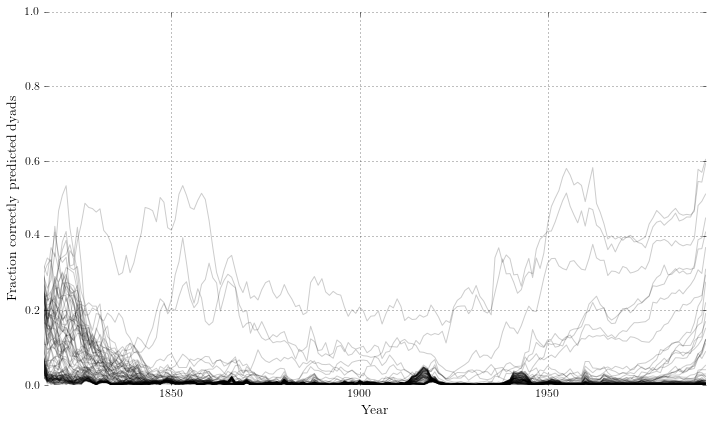

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    s = group.groupby("year")["Model_Correct"].aggregate("mean")
    s.plot(c='k', alpha=0.2, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Fraction correctly predicted dyads")
ax.set_ylim(0, 1)
ax.grid(True)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
fig.tight_layout()

In [10]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "RL_correct.pdf")

# Trying to load logit tables

In [23]:
with open("data_out/ex2_logit_summary_2.pickle", "rb") as f:
    logit_1 = pickle.load(f)

In [24]:
print(logit_1)


              War I    War II 
------------------------------
Acquiesce_A  -0.02    -0.02   
             (0.01)   (0.01)  
Acquiesce_B  0.27***  0.27*** 
             (0.01)   (0.01)  
Capitulate_A 0.47***  0.47*** 
             (0.03)   (0.03)  
Capitulate_B 0.23***  0.23*** 
             (0.04)   (0.04)  
Negotiation  0.34***  0.34*** 
             (0.01)   (0.01)  
War          0.41***  0.41*** 
             (0.01)   (0.01)  
Const.       -5.92*** -5.92***
             (0.01)   (0.01)  
Standard errors in
parentheses.
* p<.1, ** p<.05, ***p<.01


In [25]:
print(logit_1.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lcc}
\hline
             &  War I   &  War II   \\
\hline
\hline
\end{tabular}
\begin{tabular}{lll}
Acquiesce_A  & -0.02    & -0.02     \\
             & (0.01)   & (0.01)    \\
Acquiesce_B  & 0.27***  & 0.27***   \\
             & (0.01)   & (0.01)    \\
Capitulate_A & 0.47***  & 0.47***   \\
             & (0.03)   & (0.03)    \\
Capitulate_B & 0.23***  & 0.23***   \\
             & (0.04)   & (0.04)    \\
Negotiation  & 0.34***  & 0.34***   \\
             & (0.01)   & (0.01)    \\
War          & 0.41***  & 0.41***   \\
             & (0.01)   & (0.01)    \\
Const.       & -5.92*** & -5.92***  \\
             & (0.01)   & (0.01)    \\
\hline
\end{tabular}
\end{center}
\end{table}


# Equilibrium only

In [3]:
data = pd.read_pickle("FullData.pickle")

In [4]:
# The Game-Theoretic Equilibrium
equilibrium_cols = ['eqTsq', 'eqTnego', 'eqTacqa', 'eqTacqb', 'eqTcapa', 'eqTcapb', 
                'eqTwara', 'eqTwarb']

data["Equilibrium"] = ""
for col in equilibrium_cols:
    data.loc[data[col] == 1, "Equilibrium"] = col

# Cutting out missing data
data = data[data.Equilibrium!=""]

In [5]:
# Observed outcomes
data["Outcome"] = ""

data.loc[((data.cwhost1<2) & (data.cwhost2<2)), "Outcome"] = "StatusQuo"
data.loc[((data.cwhost1>3) & (data.cwhost2>3)), "Outcome"] = "War"
data.loc[((data.cwhost1==data.cwhost2) & (data.cwhost1>1) & 
          (data.cwhost1<4)), "Outcome"] = "Negotiation"
data.loc[((data.cwhost1>data.cwhost2) & (data.cwhost1>1) & 
          (data.cwhost1<4)), "Outcome"] = "Acquiesce_B"
data.loc[((data.cwhost1<data.cwhost2) & (data.cwhost2>1) & 
          (data.cwhost2<4)), "Outcome"] = "Acquiesce_A"
data.loc[((data.cwhost1>data.cwhost2) & (data.cwhost1>3)), "Outcome"] = "Capitulate_B"
data.loc[((data.cwhost1<data.cwhost2) & (data.cwhost2>3)), "Outcome"] = "Capitulate_A"

In [6]:
data.Equilibrium.replace(['eqTacqa', 'eqTwara', 'eqTsq', 'eqTnego', 'eqTacqb', 'eqTwarb'],
                    ["Acquiesce_A", "War_A", "StatusQuo", "Negotiation", "Acquiesce_B", "War_B"], 
                        inplace=True)

In [7]:
data["Eq_Observed"] = 0
data.loc[(data.Equilibrium == data.Outcome), "Eq_Observed"] = 1
data.loc[((data.Equilibrium == "War_A") & (data.Outcome=="War")), "Eq_Observed"] = 1
data.loc[((data.Equilibrium == "War_B") & (data.Outcome=="War")), "Eq_Observed"] = 1

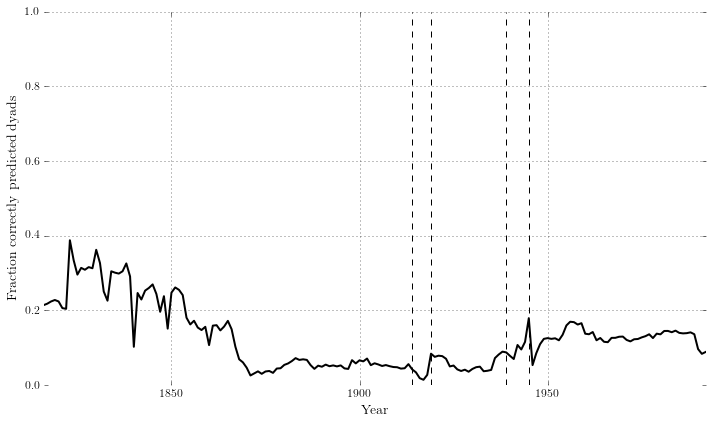

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

eq_obs_by_year = data.groupby("year")["Eq_Observed"].aggregate("mean")
eq_obs_by_year.plot(lw=2, c='k', ax=ax)

ax.set_xlabel("Year")
ax.set_ylabel("Fraction correctly predicted dyads")
ax.set_ylim(0, 1)

ax.grid(True)
for spine in ["top", "left", "right", "bottom"]:
    ax.spines[spine].set_visible(False)


ax.vlines(1914, 0, 1, linestyle='--')
ax.vlines(1919, 0, 1, linestyle='--')
ax.vlines(1939, 0, 1, linestyle='--')
ax.vlines(1945, 0, 1, linestyle='--')
    
fig.tight_layout()

In [9]:
#PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
PATH = "/Users/dmasad/Documents/Dissertation/Presentations/Defense/Figures/"
fig.savefig(PATH + "EQ_correct.pdf")

## Logits

In [8]:
data = data[data.year>1850]
observed_outcomes = pd.get_dummies(data.Outcome)
equilibria = pd.get_dummies(data.Equilibrium)
equilibria["Const."] = 1
regressors = [col for col in equilibria.columns if col != "StatusQuo"]

In [9]:
len(observed_outcomes)

997570

In [10]:
full_logits = {}
for col in observed_outcomes.columns:
    print(col)
    full_logits[col] = sm.Logit(observed_outcomes[col], equilibria[regressors])\
        .fit(method='powell')

Acquiesce_A
Optimization terminated successfully.
         Current function value: 0.004356
         Iterations: 9
         Function evaluations: 727
Acquiesce_B
Optimization terminated successfully.
         Current function value: 0.004518
         Iterations: 10
         Function evaluations: 760
Capitulate_A
Optimization terminated successfully.
         Current function value: 0.010166
         Iterations: 6
         Function evaluations: 457
Capitulate_B
Optimization terminated successfully.
         Current function value: 0.011165
         Iterations: 6
         Function evaluations: 451
Negotiation
Optimization terminated successfully.
         Current function value: 0.003260
         Iterations: 9
         Function evaluations: 697
StatusQuo
Optimization terminated successfully.
         Current function value: 0.046022
         Iterations: 6
         Function evaluations: 434
War
Optimization terminated successfully.
         Current function value: 0.024147
         Iterat

In [39]:
results = summary_col(list(full_logits.values()), float_format="%0.2f", stars=True)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [40]:
print(results)


            StatusQuo   War    Negotiation Acquiesce_A Acquiesce_B Capitulate_B Capitulate_A
--------------------------------------------------------------------------------------------
Acquiesce_A 0.34***   -0.34*** -0.92***    0.54***     -0.45**     -0.54***     -0.40***    
            (0.05)    (0.07)   (0.24)      (0.17)      (0.22)      (0.12)       (0.13)      
Acquiesce_B 0.31***   -0.54*** -0.41**     -0.73***    0.34**      -0.29***     0.08        
            (0.05)    (0.07)   (0.19)      (0.23)      (0.17)      (0.10)       (0.11)      
Negotiation 0.20***   -0.20*** -0.56***    -0.08       0.06        -0.38***     0.01        
            (0.03)    (0.05)   (0.14)      (0.14)      (0.14)      (0.07)       (0.08)      
War_A       0.53***   -0.57*** -0.86***    -0.19       -0.52***    -0.52***     -0.48***    
            (0.04)    (0.06)   (0.19)      (0.17)      (0.18)      (0.09)       (0.11)      
War_B       -0.98***  0.72     2.36***     -24.50      1.79*       0.

In [41]:
print(results.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccccc}
\hline
            & StatusQuo &   War    & Negotiation & Acquiesce_A & Acquiesce_B & Capitulate_B & Capitulate_A  \\
\hline
\hline
\end{tabular}
\begin{tabular}{llllllll}
Acquiesce_A & 0.34***   & -0.34*** & -0.92***    & 0.54***     & -0.45**     & -0.54***     & -0.40***      \\
            & (0.05)    & (0.07)   & (0.24)      & (0.17)      & (0.22)      & (0.12)       & (0.13)        \\
Acquiesce_B & 0.31***   & -0.54*** & -0.41**     & -0.73***    & 0.34**      & -0.29***     & 0.08          \\
            & (0.05)    & (0.07)   & (0.19)      & (0.23)      & (0.17)      & (0.10)       & (0.11)        \\
Negotiation & 0.20***   & -0.20*** & -0.56***    & -0.08       & 0.06        & -0.38***     & 0.01          \\
            & (0.03)    & (0.05)   & (0.14)      & (0.14)      & (0.14)      & (0.07)       & (0.08)        \\
War_A       & 0.53***   & -0.57*** & -0.86***    & -0.19       & -0.52***    & -0.52***     & -0

## Combined Wars

In [12]:
data.Equilibrium.unique()

array(['Negotiation', 'Acquiesce_B', 'Acquiesce_A', 'StatusQuo', 'War_A',
       'War_B'], dtype=object)

In [14]:
data.Equilibrium.replace(["War_A", "War_B"], ["War", "War"], inplace=True)

In [15]:
observed_outcomes = pd.get_dummies(data.Outcome)
equilibria = pd.get_dummies(data.Equilibrium)
equilibria["Const."] = 1
regressors = [col for col in equilibria.columns if col != "StatusQuo"]

In [16]:
full_logits = {}
for col in observed_outcomes.columns:
    print(col)
    full_logits[col] = sm.Logit(observed_outcomes[col], equilibria[regressors])\
        .fit(method='powell')

Acquiesce_A
Optimization terminated successfully.
         Current function value: 0.004356
         Iterations: 9
         Function evaluations: 582
Acquiesce_B
Optimization terminated successfully.
         Current function value: 0.004520
         Iterations: 10
         Function evaluations: 643
Capitulate_A
Optimization terminated successfully.
         Current function value: 0.010167
         Iterations: 6
         Function evaluations: 384
Capitulate_B
Optimization terminated successfully.
         Current function value: 0.011165
         Iterations: 6
         Function evaluations: 378
Negotiation
Optimization terminated successfully.
         Current function value: 0.003264
         Iterations: 9
         Function evaluations: 589
StatusQuo
Optimization terminated successfully.
         Current function value: 0.046028
         Iterations: 6
         Function evaluations: 366
War
Optimization terminated successfully.
         Current function value: 0.024149
         Iterat

In [17]:
results = summary_col(list(full_logits.values()), float_format="%0.2f", stars=True)

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [18]:
print(results)


            Acquiesce_B Acquiesce_A Negotiation Capitulate_A Capitulate_B StatusQuo   War   
--------------------------------------------------------------------------------------------
Acquiesce_A -0.44**     0.54***     -0.93***    -0.40***     -0.54***     0.34***   -0.34***
            (0.22)      (0.17)      (0.24)      (0.13)       (0.12)       (0.05)    (0.07)  
Acquiesce_B 0.34**      -0.73***    -0.41**     0.08         -0.29***     0.31***   -0.54***
            (0.17)      (0.23)      (0.19)      (0.11)       (0.10)       (0.05)    (0.07)  
Negotiation 0.06        -0.08       -0.57***    0.01         -0.38***     0.20***   -0.20***
            (0.14)      (0.14)      (0.14)      (0.08)       (0.07)       (0.03)    (0.05)  
War         -0.51***    -0.19       -0.82***    -0.48***     -0.52***     0.53***   -0.56***
            (0.18)      (0.17)      (0.18)      (0.11)       (0.09)       (0.04)    (0.06)  
Const.      -7.51***    -7.51***    -7.38***    -6.52***     -6.16***

# Number of actors

In [6]:
data.head()

,ccode1,ccode2,year,euwtT1v2,wrTu1v1,wrTu1v2,wrTu1vsq,wrTp1win,wrTstk1,wrTu1sq,...,cwinit,cwinitnm,cwdynm,cwhost1,cwhost2,cwkeynum,cwhiact1,cwhiact2,Equilibrium,Outcome
0,2,200,1816,-1.776549,1.131174,-1.450832,-0.238012,0.048503,2.582006,-0.238012,...,0,0,0,0,0,0,0,0,eqTacqa,StatusQuo
1,2,210,1816,-1.130330,1.025024,-1.368436,-0.238012,0.107475,2.393460,-0.238012,...,0,0,0,0,0,0,0,0,eqTacqa,StatusQuo
2,2,220,1816,-2.420352,0.925198,-1.288975,-0.238012,0.071763,2.214174,-0.238012,...,0,0,0,0,0,0,0,0,eqTacqa,StatusQuo
3,2,225,1816,-0.156504,0.899530,-1.268245,-0.238012,0.118632,2.167775,-0.238012,...,0,0,0,0,0,0,0,0,eqTacqa,StatusQuo
4,2,230,1816,-1.166779,1.025024,-1.368436,-0.238012,0.111646,2.393460,-0.238012,...,1,3239,323901,4,1,3239,16,0,eqTacqa,Capitulate_B


In [5]:
first_year = data.groupby("ccode1")["year"].aggregate("min").reset_index()
new_by_year = first_year.groupby("year").aggregate(len)

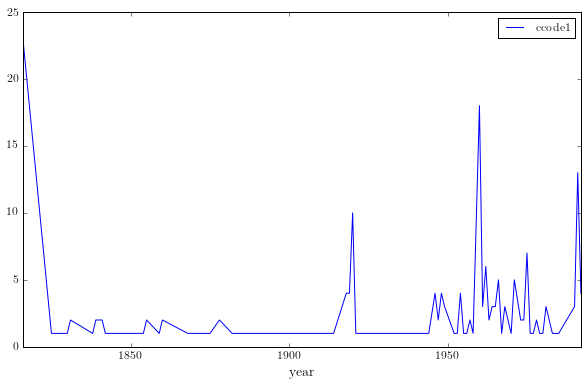

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
new_by_year.plot(ax=ax)

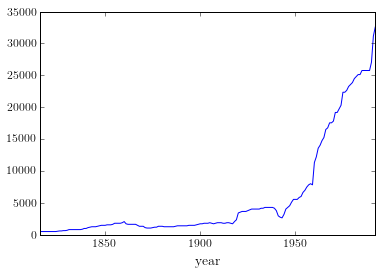

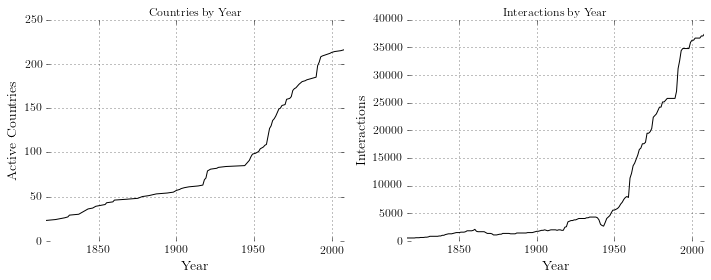

In [7]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

new_by_year.cumsum().plot(ax=ax1, c='k', legend=False)
ax1.grid(True)
ax1.set_ylabel("Active Countries")
ax1.set_title("Countries by Year")

data.groupby("year")["ccode1"].aggregate(len).plot(ax=ax2, c='k')
ax2.set_ylabel("Interactions")
ax2.set_title("Interactions by Year")
ax2.grid(True)

for ax in [ax1, ax2]:
    ax.set_xlabel("Year")
    for spine in ["top", "left", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

fig.tight_layout()

In [8]:
PATH = "/Users/dmasad/Documents/Dissertation/Dissertation/WarReason/Figures/"
fig.savefig(PATH + "DataByYear.pdf")

In [22]:
x_ticks = ax.get_xticklabels()

In [23]:
x_ticks

<a list of 5 Text xticklabel objects>

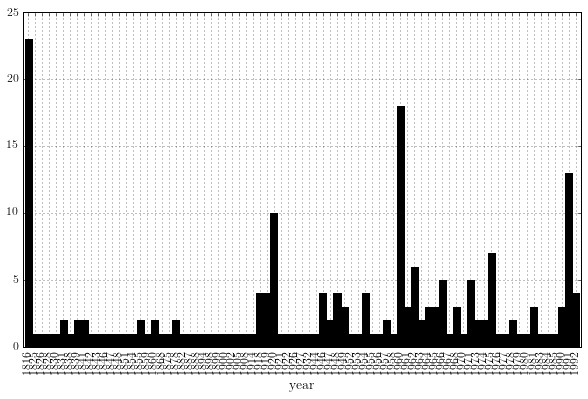

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
first_year.groupby("year").aggregate(len).plot(kind='bar', legend=False, ax=ax, 
                                                color='k', width=1.0)
ax.grid(True)

In [36]:
ax.get_xticks()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [37]:
for l in ax.get_xticklabels():
    print(l)

Text(0,0,'1816')
Text(1,0,'1825')
Text(2,0,'1826')
Text(3,0,'1828')
Text(4,0,'1830')
Text(5,0,'1831')
Text(6,0,'1838')
Text(7,0,'1839')
Text(8,0,'1841')
Text(9,0,'1842')
Text(10,0,'1843')
Text(11,0,'1846')
Text(12,0,'1847')
Text(13,0,'1848')
Text(14,0,'1851')
Text(15,0,'1854')
Text(16,0,'1855')
Text(17,0,'1859')
Text(18,0,'1860')
Text(19,0,'1868')
Text(20,0,'1875')
Text(21,0,'1878')
Text(22,0,'1882')
Text(23,0,'1887')
Text(24,0,'1888')
Text(25,0,'1894')
Text(26,0,'1898')
Text(27,0,'1899')
Text(28,0,'1900')
Text(29,0,'1902')
Text(30,0,'1905')
Text(31,0,'1908')
Text(32,0,'1914')
Text(33,0,'1918')
Text(34,0,'1919')
Text(35,0,'1920')
Text(36,0,'1921')
Text(37,0,'1922')
Text(38,0,'1926')
Text(39,0,'1927')
Text(40,0,'1932')
Text(41,0,'1944')
Text(42,0,'1946')
Text(43,0,'1947')
Text(44,0,'1948')
Text(45,0,'1949')
Text(46,0,'1952')
Text(47,0,'1953')
Text(48,0,'1954')
Text(49,0,'1955')
Text(50,0,'1956')
Text(51,0,'1957')
Text(52,0,'1958')
Text(53,0,'1960')
Text(54,0,'1961')
Text(55,0,'1962')
Te

In [32]:
print(l)

Text(78,0,'1992')


# Tree to dot

In [1]:
import json

In [3]:
with open("international_interaction_game.json") as f:
    tree = json.load(f)

In [5]:
tree = tree["tree"]

In [9]:
end_nodes = ""
for node, moves in tree.items():
    
    if moves is not None:
        for move, target in moves.items():
            print('{} -> {} [label="{}"];'.format(node, target, move))
    else:
        end_nodes += "{}; ".format(node)

print()
print(end_nodes)

8 -> War_B1 [label="Fight"];
8 -> Capitulate_A1 [label="NotFight"];
1 -> 3 [label="Fight"];
1 -> 2 [label="NotFight"];
3 -> 5 [label="Fight"];
3 -> Acquiesce_B [label="NotFight"];
5 -> 10 [label="Fight"];
5 -> 9 [label="NotFight"];
4 -> 6 [label="Fight"];
4 -> Acquiesce_A [label="NotFight"];
10 -> War_A1 [label="Fight"];
10 -> Capitulate_B1 [label="NotFight"];
9 -> 12 [label="Fight"];
9 -> Negotiate_2 [label="NotFight"];
11 -> War_A2 [label="Fight"];
11 -> Capitulate_B2 [label="NotFight"];
6 -> 8 [label="Fight"];
6 -> 7 [label="NotFight"];
12 -> War_B2 [label="Fight"];
12 -> Capitulate_A2 [label="NotFight"];
2 -> 4 [label="Fight"];
2 -> StatusQuo [label="NotFight"];
7 -> 11 [label="Fight"];
7 -> Negotiate_1 [label="NotFight"];

Capitulate_A1; War_A1; Capitulate_B1; Capitulate_A2; Capitulate_B2; War_B2; Negotiate_1; Negotiate_2; Acquiesce_B; War_B1; War_A2; StatusQuo; Acquiesce_A; 
